<a href="https://colab.research.google.com/github/KyoungmiKwon/trainingAtAiffel/blob/main/Regression_HousePrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

`House Prices`


In [10]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as s


#### 데이터 불러오기

In [11]:
house = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Aiffel/modu-ds-4-house-prices/train.csv')
house.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,968,20,RL,NaN,7390,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1955,1955,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,151.0,TA,TA,CBlock,TA,TA,No,ALQ,902,Unf,0,196,1098,GasA,TA,Y,SBrkr,1098,0,0,1098,1,0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1955.0,Unf,1,260,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal,135000


## 데이터 탐색 및 전처리

In [14]:
house.info()
#house.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    950 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          70 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [15]:
house.select_dtypes(include=['object']).columns.tolist()

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [16]:
# 중복 확인
house.duplicated().sum()

np.int64(0)

In [17]:
# 결측 확인
null_count = house.isnull().sum() # 각 컬럼별 결측값 개수 확인
a = null_count[null_count > 0].sort_values(ascending=False) # 결측값이 0보다 큰 컬럼만 선택하고 내림차순 정렬
print(house.dtypes.value_counts(), end='\n\n\n') # 데이터 타입별 컬럼수
b = house[a.index].select_dtypes(include=['int64','float64']).columns.tolist() # 결측값이 있는 컬럼 중에서 특정 데이터 타입 컬럼 이름만 추출
c = house[a.index].select_dtypes(include=['object']).columns.tolist() # 결측값이 있는 컬럼 중에서 특정 데이터 타입 컬럼 이름만 추출

print(a[b],end='\n\n\n') # 숫자형 데이터 결측 컬럼
print(a[c]) # 범수형 데이터 결측 컬럼

object     43
int64      35
float64     3
Name: count, dtype: int64


LotFrontage    218
GarageYrBlt     69
MasVnrArea       8
dtype: int64


PoolQC          1162
MiscFeature     1120
Alley           1098
Fence            941
MasVnrType       694
FireplaceQu      545
GarageType        69
GarageFinish      69
GarageQual        69
GarageCond        69
BsmtExposure      24
BsmtFinType2      24
BsmtQual          23
BsmtCond          23
BsmtFinType1      23
Electrical         1
dtype: int64


In [18]:
df_1 = house.copy()
# Null 이 너무 많은 범주형 컬럼들과 불필요한 컬럼 삭제
df_1.drop(['Id','PoolQC' , 'MiscFeature', 'Alley', 'Fence','FireplaceQu'], axis=1 , inplace=True)
# 숫자형 null 컬럼들은 mean으로 대체 (위에서 숫자 null 컬럼이름 추출한 변수 b 이용)
df_1[b] = df_1[b].fillna(df_1[b].mean())

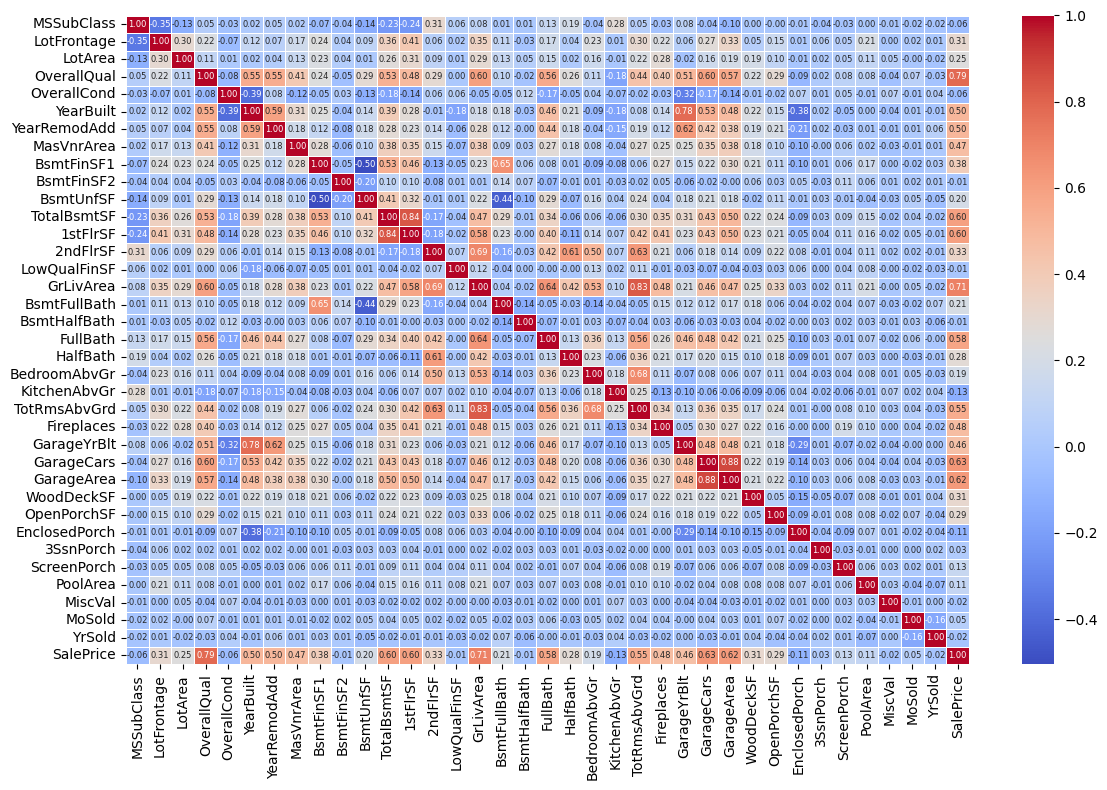

,,correlation
GarageCars,GarageArea,0.882274
TotalBsmtSF,1stFlrSF,0.837397
GrLivArea,TotRmsAbvGrd,0.828978


In [19]:
# 숫자형 컬럼 상관계수 검토
d = df_1[df_1.select_dtypes(include=['int64','float64']).columns.tolist()]
corr_matrix = d.corr()

plt.figure(figsize=(12, 8))  # 그림 크기 설정 (선택 사항)
sns.heatmap(corr_matrix, annot=True, annot_kws={'size': 6}, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.tight_layout()
plt.show()

def get_high_correlation_pairs(df, threshold=0.8):
    """
    DataFrame의 컬럼 간 상관계수가 지정된 임계값 이상인 쌍과 해당 상관계수를 반환합니다.

    Args:
        df (pd.DataFrame): 상관계수를 분석할 DataFrame.
        threshold (float): 상관계수의 임계값 (기본값: 0.8).

    Returns:
        pd.DataFrame: 상관계수가 임계값 이상인 컬럼 쌍과 해당 상관계수를 담은 DataFrame.
    """
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    high_corr = upper.stack()
    high_corr_filtered = high_corr[high_corr >= threshold].sort_values(ascending=False)
    high_corr_df = pd.DataFrame(high_corr_filtered, columns=['correlation'])
    return high_corr_df


get_high_correlation_pairs(d, threshold=0.8)

In [20]:
# 상관계수 0.8 이상인 컬럼간의 다중공선성 확인

def get_vif(df, col1, col2):
    """
    DataFrame 내 두 컬럼의 VIF를 간략하게 계산합니다.
    VIF < 5 : 일반적으로 낮은 공선성 또는 문제가 없다고 평가
    5 <= VIF < 10 : 중간 정도의 공선성이 있는 것으로 판단, 주의 필요로 판단
    VIF >= 10 :  다중공선성문제가 높다고 평가
    """
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    import statsmodels.api as sm

    if col1 not in df.columns or col2 not in df.columns:
        return "Error: 컬럼 이름 오류"

    X = sm.add_constant(df[[col1, col2]])
    vif_col1 = variance_inflation_factor(X.values, 1)
    vif_col2 = variance_inflation_factor(X.values, 2)

    return f"VIF: {vif_col1:.2f}"

print(get_vif(d, 'GarageCars', 'GarageArea'))
print(get_vif(d, 'TotalBsmtSF', '1stFlrSF'))
print(get_vif(d, 'GrLivArea', 'TotRmsAbvGrd'))


VIF: 4.51
VIF: 3.35
VIF: 3.20


In [21]:
df_1.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,56.97774,70.058947,10336.357877,6.105308,5.595890,1971.201199,1985.021404,102.938793,442.928938,42.537671,574.708904,1060.175514,1161.748288,344.853596,5.094178,1511.696062,0.425514,0.058219,1.562500,0.388699,2.865582,1.047089,6.511130,0.625856,1978.404914,1.761130,469.888699,90.971747,47.554795,22.715753,3.219178,16.332192,2.955479,51.279110,6.306507,2007.830479,180194.401541
std,42.29068,22.330092,8784.854640,1.373032,1.127388,30.362445,20.693264,175.537814,462.364719,151.670697,440.959454,439.223929,392.662227,438.502580,44.876004,535.707765,0.518319,0.241463,0.551882,0.506624,0.824796,0.223722,1.639763,0.654232,24.238405,0.746517,213.604836,123.811685,68.250085,63.042971,29.241246,58.828037,41.648504,552.357575,2.715955,1.323583,78869.201529
min,20.00000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1908.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.00000,60.000000,7560.000000,5.000000,5.000000,1954.000000,1966.750000,0.000000,0.000000,0.000000,233.000000,793.000000,880.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.750000,1.000000,336.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129500.000000
50%,50.00000,70.058947,9446.000000,6.000000,5.000000,1972.500000,1994.000000,0.000000,374.500000,0.000000,485.500000,990.000000,1077.500000,0.000000,0.000000,1456.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.404914,2.000000,477.500000,0.000000,25.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,70.00000,79.000000,11601.500000,7.000000,6.000000,2001.000000,2004.000000,166.250000,714.500000,0.000000,813.250000,1306.000000,1392.500000,728.000000,0.000000,1774.250000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.250000,2.000000,576.000000,165.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213062.500000
max,190.00000,313.000000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1170.000000,5644.000000,1474.000000,2153.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,736.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'Bedroo

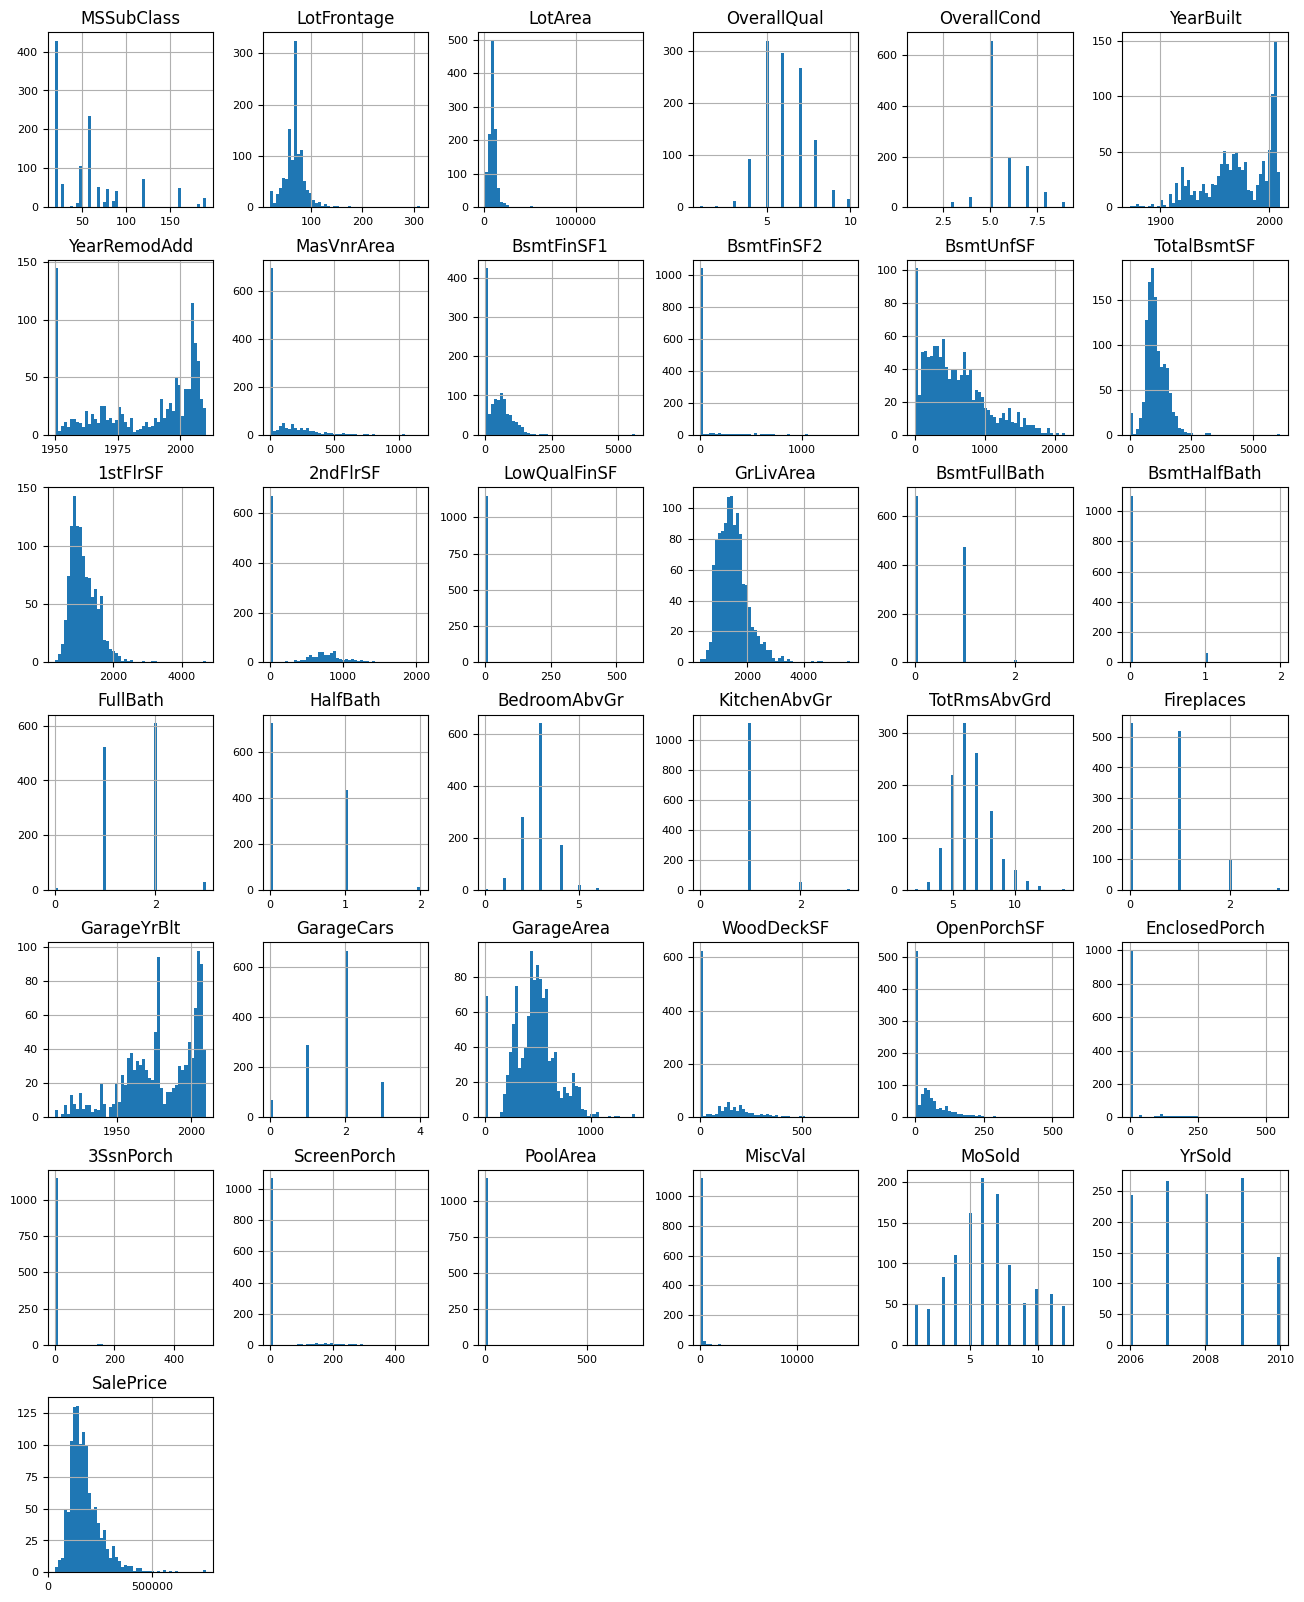

In [22]:
d.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

<Figure size 400x300 with 0 Axes>

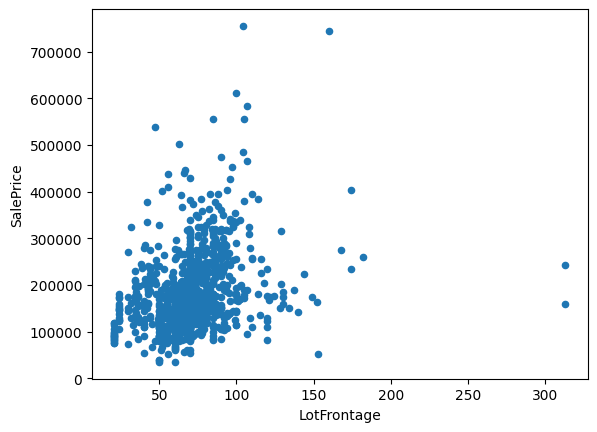

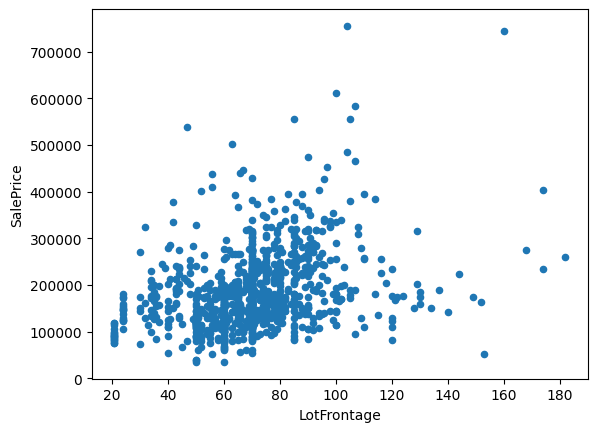

In [23]:
# LotFrontage

plt.figure(figsize=(4, 3))

# df_1['LotFrontage'].hist(bins = 100) # histogram 확인

df_1a = df_1.copy()

# Scatter plot
df_1a.plot.scatter(x= 'LotFrontage', y='SalePrice')
df_1a.drop(df_1a[df_1['LotFrontage'] >= 250].index, inplace=True) # 이상치 삭제

df_1a.plot.scatter(x= 'LotFrontage', y='SalePrice')
plt.show()

<Axes: xlabel='LotArea', ylabel='SalePrice'>

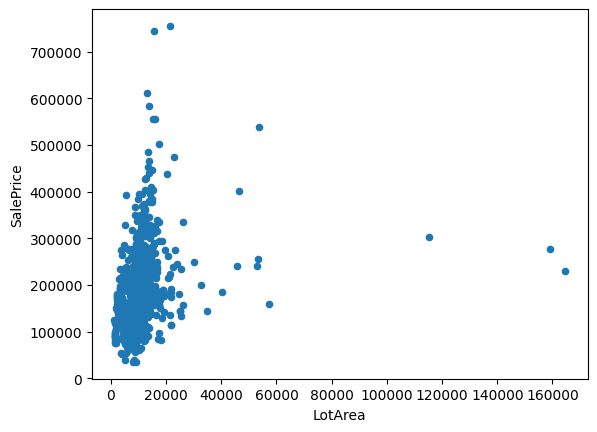

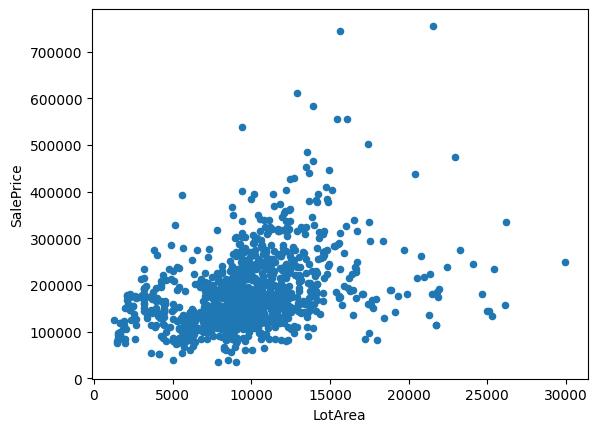

In [24]:
# LotArea

# Scatter plot
df_1a.plot.scatter(x= 'LotArea', y='SalePrice')

# df_1a[df_1a['LotArea'] >= 56000]

df_1b = df_1a.copy()
df_1b.loc[df_1b['LotArea'] >= 30000, 'LotArea'] = df_1b['LotArea'].median() # 이상치 중앙값으로 대체

df_1b.plot.scatter(x= 'LotArea', y='SalePrice')

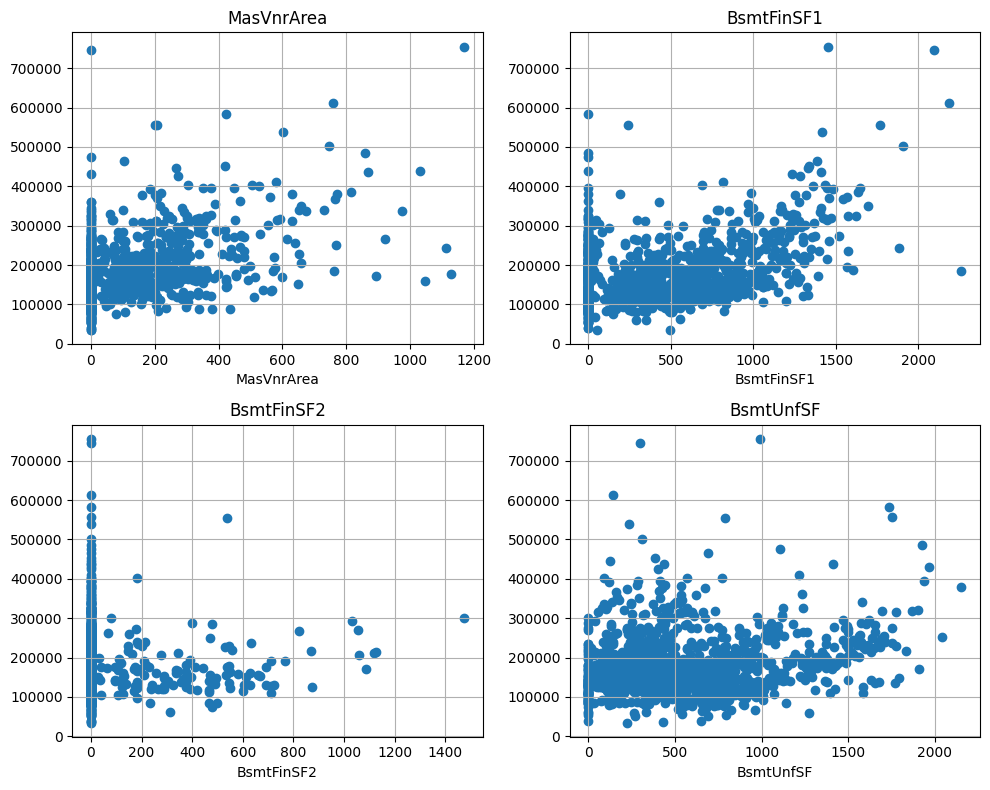

In [25]:
# MasVnrArea	BsmtFinSF1	BsmtFinSF2	BsmtUnfSF

features_to_plot = ['MasVnrArea', 'BsmtFinSF1',	'BsmtFinSF2', 'BsmtUnfSF']

# subplot 개수 설정 (행, 열)
num_plots = len(features_to_plot)
rows = 2
cols = (num_plots + rows - 1) // rows  # subplot 개수에 맞춰 열 개수 자동 계산

# figure와 axes 생성
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
axes = axes.flatten()  # 2차원 axes 배열을 1차원으로 펼쳐서 인덱싱 용이하게 함

# 각 subplot에 산점도 그리기
for i, feature in enumerate(features_to_plot):
    ax = axes[i]
    ax.scatter(df_1b[feature], df_1b['SalePrice'])
    ax.set_xlabel(feature)
    ax.set_title(f'{feature}')
    ax.grid(True)

plt.tight_layout()
plt.show()

<Axes: title={'center': 'BsmtFinSF2'}, xlabel='BsmtFinType2'>

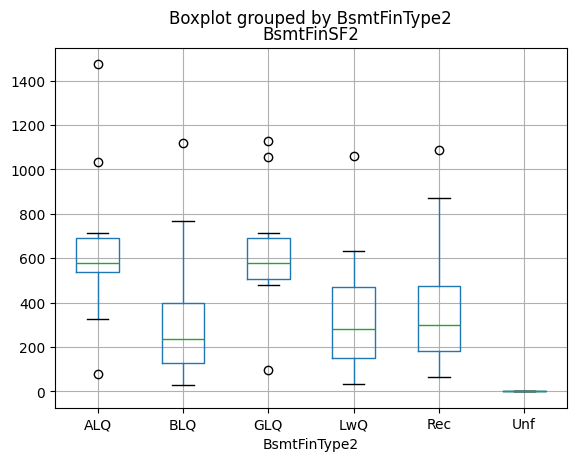

In [26]:
df_1b[df_1b['BsmtFinSF2'] == 0]

df_1b.boxplot(column='BsmtFinSF2', by='BsmtFinType2')

In [27]:
df_1b['BsmtFinType2'].value_counts()

,count
BsmtFinType2,
Unf,1016
Rec,40
LwQ,37
BLQ,24
ALQ,15
GLQ,10


In [28]:
df_1b[df_1b['BsmtFinType2'] == 'Unf']['BsmtFinSF2'].value_counts()

,count
BsmtFinSF2,
0,1016


In [29]:
df_1c = df_1b.copy()

df_1c.drop(['BsmtFinSF2','BsmtFinType2'], axis=1, inplace=True)
df_1c.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,20,RL,70.058947,7390.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1955,1955,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,151.0,TA,TA,CBlock,TA,TA,No,ALQ,902,196,1098,GasA,TA,Y,SBrkr,1098,0,0,1098,1,0,1,0,3,1,TA,6,Typ,0,Attchd,1955.000000,Unf,1,260,TA,TA,Y,0,0,0,0,0,0,0,7,2008,WD,Normal,135000
1,90,RL,60.000000,10800.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,5,5,1987,1988,Gable,CompShg,Plywood,Plywood,NaN,0.0,TA,TA,CBlock,Gd,Gd,Gd,GLQ,1200,0,1200,GasA,TA,Y,SBrkr,1200,0,0,1200,3,0,3,0,3,1,TA,5,Typ,0,NaN,1978.404914,NaN,0,0,NaN,NaN,Y,120,0,0,0,0,0,0,3,2009,WD,Alloca,179000


## 지운 컬럼들 - 기억할 것
house_df.drop(['Id','PoolQC' , 'MiscFeature', 'Alley', 'Fence','FireplaceQu'], axis=1 , inplace=True)
df_1c.drop(['BsmtFinType2','BsmtFinSF2'], axis=1, inplace=True)

In [30]:
from scipy.stats import skew

# object가 아닌 숫자형 피처의 칼럼 index 객체 추출.
features_index = df_1c.dtypes[df_1c.dtypes != 'object'].index
# house_df에 칼럼 index를 [ ]로 입력하면 해당하는 칼럼 데이터 세트 반환. apply lambda로 skew( ) 호출
skew_features = df_1c[features_index].apply(lambda x : skew(x))
# skew(왜곡) 정도가 1 이상인 칼럼만 추출.
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))

MiscVal          22.080120
PoolArea         15.673692
3SsnPorch        11.030969
LowQualFinSF      9.600368
KitchenAbvGr      4.483926
BsmtHalfBath      4.129593
ScreenPorch       3.972757
EnclosedPorch     3.090527
OpenPorchSF       2.462367
MasVnrArea        2.421960
SalePrice         1.956244
WoodDeckSF        1.548445
MSSubClass        1.390297
GrLivArea         1.192461
dtype: float64


In [31]:
#Label인 SalePrice 제외(나중에 다시 돌리는 경우에 대비하여)하고 skew 정도 1이상인 컬럼 로그 스케일링
print(skew_features_top.index)
cols = ['MSSubClass', 'MasVnrArea', 'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath',
       'KitchenAbvGr', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']
df_1d = df_1c.copy()
df_1d[cols] = np.log1p(df_1d[cols])

Index(['MSSubClass', 'MasVnrArea', 'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath',
       'KitchenAbvGr', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice'],
      dtype='object')


In [75]:
len(df_1d.columns)

73

## 범주형데이터 원핫인코딩

In [32]:
df_2 = df_1d.copy()
print('get_dummies() 수행 전 데이터 Shape:', df_2.shape)
df_2 = pd.get_dummies(df_2)
print('get_dummies() 수행 후 데이터 Shape:', df_2.shape)

get_dummies() 수행 전 데이터 Shape: (1166, 73)
get_dummies() 수행 후 데이터 Shape: (1166, 259)


## Label 값 살펴보기

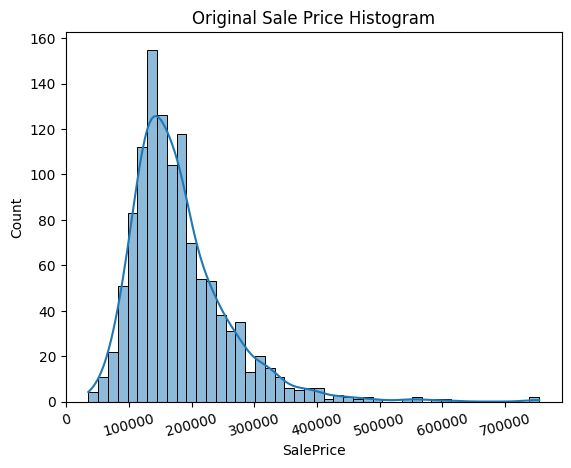

In [33]:
plt.title('Original Sale Price Histogram')
plt.xticks(rotation=15)
sns.histplot(df_2['SalePrice'], kde=True)
plt.show()

<Axes: >

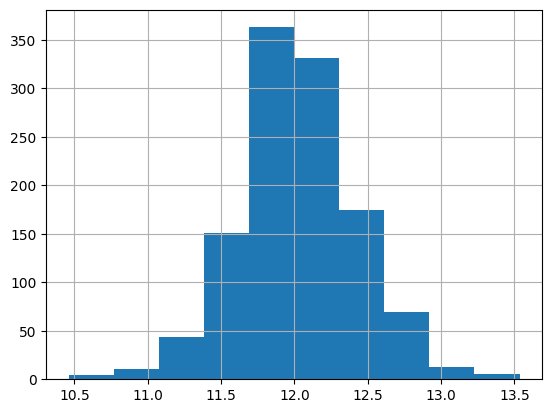

In [34]:
# SalePrice 로그 변환
original_SalePrice = df_2['SalePrice']

df_3 = df_2.copy()
df_3['SalePrice'] = np.log1p(df_3['SalePrice'])
df_3.SalePrice.hist()

## 다양한 함수 정의

In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

# 평가함수정의
def get_rmse(model):
    from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

    pred = model.predict(X_test)
    pred_exp = np.expm1(pred)
    mse = mean_squared_error(np.expm1(y_test) , pred_exp)
    mse2 = mean_squared_error(y_test , pred)
    rmse0 = np.sqrt(mse)
    r2_score_val = r2_score(y_test,pred)

    print('# {0} #'.format(model.__class__.__name__))
    print('로그 RMSE: {2}, RMSE: {4}, R2 Score: {0}'.format(np.round(r2_score_val, 2),model.__class__.__name__,np.round(np.sqrt(mse2), 3),model.__class__.__name__,np.round(rmse0, 3)))

def get_rmses(models):
    rmses = [ ]
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses


def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

def rmse(y, pred):
  """
  Root Mean Squared Error (RMSE)를 계산합니다.

  Args:
    y: 실제 값의 배열 또는 Series.
    pred: 예측 값의 배열 또는 Series.

  Returns:
    RMSE 값 (float).
  """
  mse = mean_squared_error(y_true, y_pred)
  rmse_val = np.sqrt(mse)
  return rmse_val

# 사이킷런의 mean_square_error() 를 이용하여 RMSE 계산
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

# MSE, RMSE, RMSLE 를 모두 계산
def evaluate_regr(y,pred):
    """
    y는 실제값, target 값
    pred는 예측값
    """
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    # MAE 는 scikit learn의 mean_absolute_error() 로 계산
    mae_val = mean_absolute_error(y,pred)
    r2_score_val = r2_score(y,pred)
    rmse_val2 = rmse(np.expm1(y),np.expm1(pred))
    print('로그RMSE: {1:.3F}, RMSE: {4:.2f}, R2:{3:.2f}'.format(rmsle_val, rmse_val, mae_val, r2_score_val, rmse_val2))


def get_top_bottom_coef(model):
    # coef_ 속성을 기반으로 Series 객체를 생성. index는 컬럼명.
    coef = pd.Series(model.coef_, index=X_features.columns)

    # + 상위 10개 , - 하위 10개 coefficient 추출하여 반환.
    coef_high = coef.sort_values(ascending=False).head(10)
    coef_low = coef.sort_values(ascending=False).tail(10)
    return coef_high, coef_low


def visualize_coefficient(models):
    # 3개 회귀 모델의 시각화를 위해 3개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=3)
    fig.tight_layout()
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 회귀 계수 시각화.
    for i_num, model in enumerate(models):
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합.
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat( [coef_high , coef_low] )
        # 순차적으로 ax subplot에 barchar로 표현. 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정.
        axs[i_num].set_title(model.__class__.__name__+' Coeffiecents', size=25)
        axs[i_num].tick_params(axis="y",direction="in", pad=-120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i_num])


def get_avg_rmse_cv(models):
    for model in models:
        # 분할하지 않고 전체 데이터로 cross_val_score( ) 수행. 모델별 CV RMSE값과 평균 RMSE 출력
        rmse_list = np.sqrt(-cross_val_score(model, X_features, y_target,
                                             scoring="neg_mean_squared_error", cv = 5))
        rmse_avg = np.mean(rmse_list)
        print('\n{0} CV RMSE 값 리스트: {1}'.format( model.__class__.__name__, np.round(rmse_list, 3)))
        print('{0} CV 평균 RMSE 값: {1}'.format( model.__class__.__name__, np.round(rmse_avg, 3)))


## 데이터 나누기

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


y_target = df_3['SalePrice']
X_features = df_3.drop('SalePrice',axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

## 모델 학습-예측-평가

### 일반 선형모델

| 모델1 | 1_성능 | 모델2 | 2_성능 | 결과 | 비고 | 비고 |
|---|---|---|---|---|---|---|
|lr  |  |  |  | R2 Score: 0.87, 로그 RMSE: 0.134, RMSE: 22936.098
 || |
|Ridge  | |  |  |R2 Score: 0.88, 로그 RMSE: 0.131, RMSE: 22760.342
  |  ||
|Lasso  ||  |  |  R2 Score: 0.79, 로그 RMSE: 0.172, RMSE: 31743.37
|  ||

In [37]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# LinearRegression #
로그 RMSE: 0.128, RMSE: 22616.706, R2 Score: 0.88
# Ridge #
로그 RMSE: 0.125, RMSE: 22229.137, R2 Score: 0.89
# Lasso #
로그 RMSE: 0.172, RMSE: 31801.384, R2 Score: 0.79


[None, None, None]

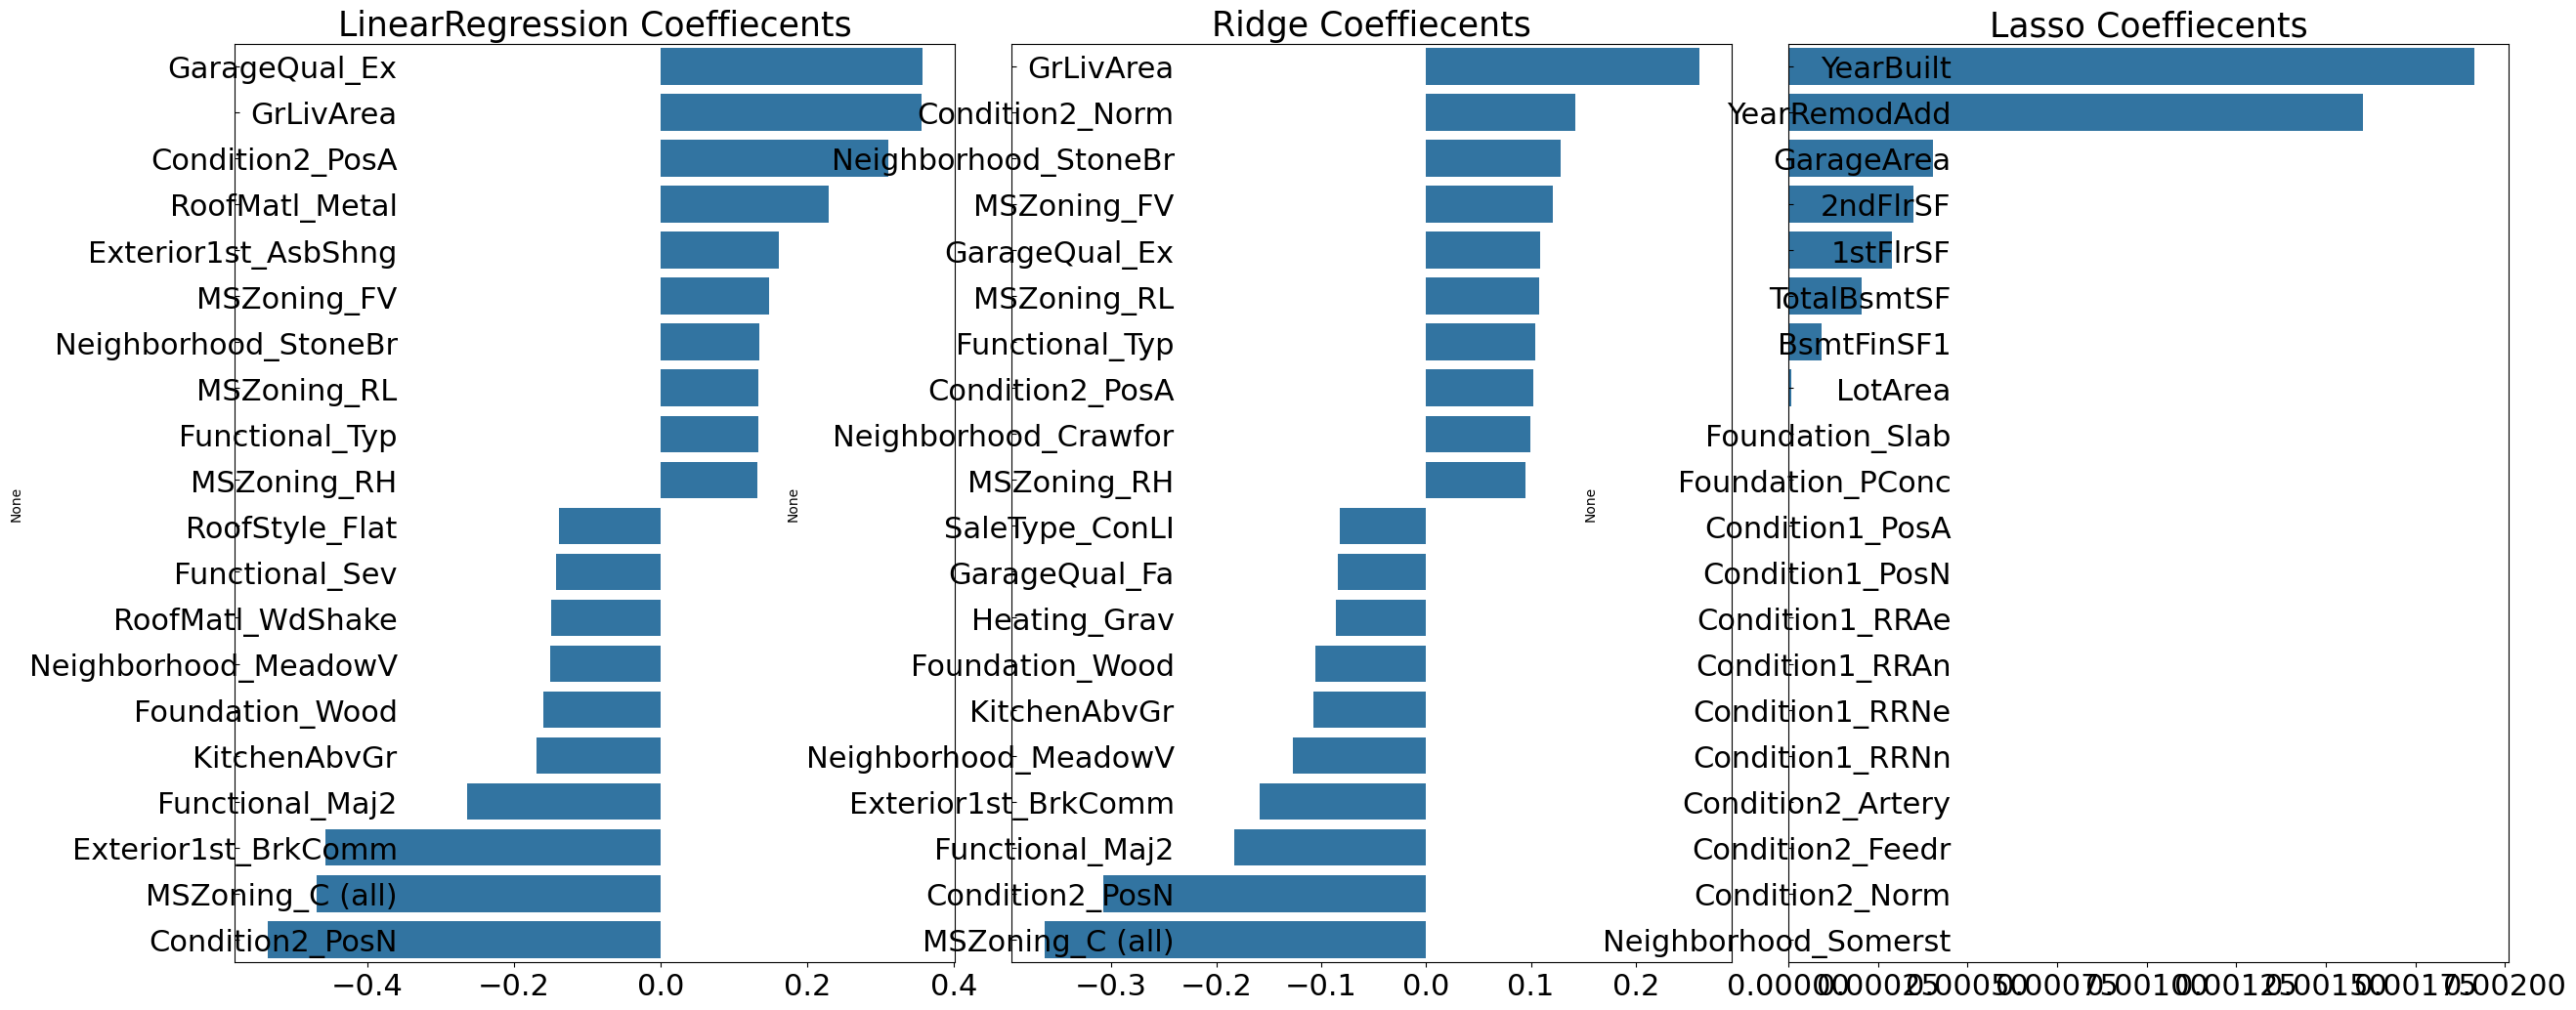

In [38]:
# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 회귀 계수 시각화.
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

#### 릿지함수

In [39]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

ridge_model = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha = 400))
])

ridge_model.fit(X_train, y_train)
pred = ridge_model.predict(X_test)
evaluate_regr(y_test, pred)

로그RMSE: 0.125, RMSE: 21100.69, R2:0.89


In [40]:
# cross validation
a = cross_val_score(ridge_model, X_features, y_target, scoring="neg_mean_squared_error", cv = 5)
b = np.sqrt(-a)
np.mean(b)

np.float64(0.1265183255624538)

<Axes: >

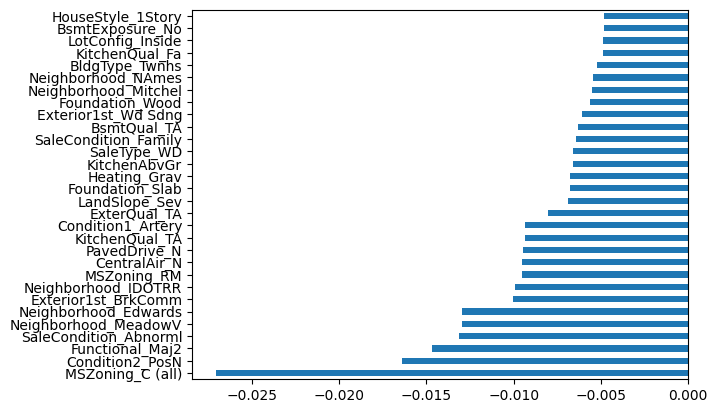

In [41]:
# 파이프라인의 마지막 단계 (Ridge 모델) 접근
a = ridge_model.steps[-1][1]
# Ridge 모델의 계수 확인
coefs = pd.Series(a.coef_, index = X_features.columns)
coefs.sort_values(ascending=True)[:30].plot(kind='barh')

In [42]:
# 파라미터튜닝
from sklearn.model_selection import GridSearchCV

params = { 'ridge__alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }

grid_model = GridSearchCV(ridge_model,
                          param_grid = params,
                          cv=5)
grid_model.fit(X_features, y_target)
b = -np.sqrt(grid_model.best_score_)
print(b, grid_model.best_params_)

-0.9439543715785328 {'ridge__alpha': 20}


#### 랏소함수

In [43]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

lasso_model = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso(alpha=0.008))
])

lasso_model.fit(X_train, y_train)
pred = lasso_model.predict(X_test)
evaluate_regr(y_test, pred)

로그RMSE: 0.111, RMSE: 20718.93, R2:0.91


In [44]:
# cross validation
a = cross_val_score(lasso_model, X_features, y_target, scoring="neg_mean_squared_error", cv = 5)
b = np.sqrt(-a)
np.mean(b)

np.float64(0.12375385419746274)

### Random Forest - Bagging

In [45]:
# 어제 파라미터 튜닝을 이리저리 해 본 결과, 결과가 좋지않아 basic 하게 파라미터값 설정
from sklearn.ensemble import RandomForestRegressor

params = {'n_estimators': 1000, 'max_depth': 15, 'min_samples_split' : 5}

rf_model = RandomForestRegressor(**params,
                                 n_jobs=-1,
                                 )
rf_model.fit(X_train, y_train)

# 모델 평가
pred = rf_model.predict(X_test)
evaluate_regr(y_test, pred)

로그RMSE: 0.131, RMSE: 24508.68, R2:0.88


In [46]:
# cross validation
a = cross_val_score(rf_model, X_features, y_target, scoring="neg_mean_squared_error", cv = 5)
b = np.sqrt(-a)
np.mean(b)

np.float64(0.14678037558549967)

### XGBoost Regressor

In [ ]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor(n_estimators=1000,
                        learning_rate=0.05,
                        early_stopping_rounds = 100,
                        colsample_bytree=0.5,
                        subsample=0.8,
                        max_depth=5,
                        min_child_weight=1,
                        matric = 'rmse',
                        verbose=True
                       )

xgb_reg.fit(X_train, y_train,
            eval_set = [(X_train, y_train), (X_test, y_test)],
            )

pred = xgb_reg.predict(X_test)
evaluate_regr(y_test, pred)

# 결과 : 로그RMSE: 0.116, RMSE: 20781.40, R2:0.91

In [ ]:
# 파라미터튜닝
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# 하이퍼파라미터 검색 공간 설정
params = {
    'learning_rate': hp.loguniform('learning_rate', np.log(0.005), np.log(0.3)),
    'max_depth': hp.choice('max_depth', [1, 3, 5, 7, 9]),
    'min_child_weight': hp.loguniform('min_child_weight', np.log(0.1), np.log(10)),
    'subsample': hp.uniform('subsample', 0.7, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.6, 1.0)
}
# 목적 함수 설정
def objective_func(search_space):
    model = XGBRegressor(
        n_estimators=500,  # 충분히 큰 n_estimators 설정
        **search_space,
        early_stopping_rounds = 80,
        matric = 'rmse',
        verbose=0
    )

    from sklearn.model_selection import KFold
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = []

    for train_index, val_index in cv.split(X_train, y_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        model.fit(
            X_train_fold, y_train_fold,
            eval_set=[(X_val_fold, y_val_fold)]
        )

        y_pred_val = model.predict(X_val_fold)
        rmse_val = rmse(y_val_fold, y_pred_val)
        p.sqrt(mean_squared_error(y,pred))

        scores.append(rmse_val)

    return np.mean(scores)

# fmin() 호출
trials = Trials()
best = fmin(
    fn=objective_func,
    space=params,
    algo=tpe.suggest,
    max_evals=50,
    trials=trials
)

print('Best parameters:', best)

# 최적 점수 확인
best_score = min([trial['result']['loss'] for trial in trials.trials])
print("Best score:", best_score)
# Best score: 0.00978264667279993
# Best parameters: {'colsample_bytree': np.float64(0.6161346141383636), 'learning_rate': np.float64(0.18014703555289627), 'max_depth': np.int64(0), 'min_child_weight': np.float64(0.8330537800646544), 'subsample': np.float64(0.9992719042700027)}


In [ ]:
XGB_model = XGBRegressor(**best,
                          n_estimators=1000,
                          verbose=0,
                          early_stopping_rounds = 150,
                          matric = 'rmse',
                          )

evals = [(X_train, y_train), (X_test, y_test)]

XGB_model.fit(
    X_train, y_train,
    eval_set=evals,  # 평가 데이터셋 설정
)

pred = XGB_model.predict(X_test)
evaluate_regr(y_test, pred)

# 로그RMSE: 0.140, RMSE: 23810.03, R2:0.86

### LightGBM Regressor

In [67]:
from lightgbm import LGBMRegressor, early_stopping

lgbm_reg = LGBMRegressor(n_estimators=3000,
                          num_leaves=4,
                          n_jobs=-1,
                          subsample=0.6,
                          colsample_bytree=0.4,
                          learning_rate=0.05,
                          leg_lambda=10,
                          boost_from_average=False,
                          verbose=-1
                         )

evals = [(X_train, y_train), (X_test, y_test)]
lgbm_reg.fit(
    X_train, y_train,
    eval_set=evals,  # 평가 데이터셋 설정
    eval_metric='rmse',  # 평가 지표 설정
    callbacks=[early_stopping(stopping_rounds=100)],  # early stopping 설정
)
pred = lgbm_reg.predict(X_test)
evaluate_regr(y_test, pred)

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1175]	training's rmse: 0.0640628	training's l2: 0.00410405	valid_1's rmse: 0.121691	valid_1's l2: 0.0148087
로그RMSE: 0.122, RMSE: 23453.35, R2:0.90


In [ ]:
# 파라미터 튜닝
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
from lightgbm import LGBMRegressor, early_stopping
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# RMSLE 계산 함수
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

# 하이퍼파라미터 검색 공간 설정
params = {
    'num_leaves': hp.randint('num_leaves', 20, 150),
    'max_depth': hp.choice('max_depth', [-1, 5, 10, 15]),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.0067), np.log(0.37)),
    'min_child_weight': hp.loguniform('min_child_weight', np.log(0.002), np.log(20)),
    'min_child_samples': hp.randint('min_child_samples', 10, 100),
    'subsample': hp.uniform('subsample', 0.7, 1.0),
    'subsample_freq': hp.choice('subsample_freq', [0, 1]),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.6, 1.0),
}

# 목적 함수 설정
def objective_func(search_space):
    model = LGBMRegressor(
        n_estimators=1000,  # 충분히 큰 n_estimators 설정
        **search_space,
        n_jobs=-1,
        importance_type='split',
        boost_from_average=False,
        verbose=-1
    )

    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = []

    for train_index, val_index in cv.split(X_train, y_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        model.fit(
            X_train_fold, y_train_fold,
            eval_set=[(X_val_fold, y_val_fold)],
            eval_metric='rmse',  # LightGBM의 기본 평가 지표 사용
            callbacks=[early_stopping(stopping_rounds=150)],  # early stopping 설정

        )

        y_pred_val = model.predict(X_val_fold)
        rmse_val = rmse(y_val_fold, y_pred_val)
        scores.append(rmse_val)

    return np.mean(scores)

# fmin() 호출
trials = Trials()
best = fmin(
    fn=objective_func,
    space=params,
    algo=tpe.suggest,
    max_evals=50,
    trials=trials
)

print('Best parameters:', best)

# 최적 점수 확인
best_score = min([trial['result']['loss'] for trial in trials.trials])
print("Best score:", best_score)

# Best parameters: {'colsample_bytree': np.float64(0.829371050813894), 'learning_rate': np.float64(0.01492610904208943), 'max_depth': np.int64(1), 'min_child_samples': np.int64(18), 'min_child_weight': np.float64(4.558977905963804), 'num_leaves': np.int64(125), 'subsample': np.float64(0.712245454685487), 'subsample_freq': np.int64(1)}
# Best score: 0.13101958737471397

In [64]:
LGBM_model = LGBMRegressor(**best,
                          n_estimators=1000,
                          verbose=-1,
                          #objective='rmse'
                          )

evals = [(X_train, y_train), (X_test, y_test)]

LGBM_model.fit(
    X_train, y_train,
    eval_set=evals,  # 평가 데이터셋 설정
    eval_metric='rmsle',  # 평가 지표 설정
    callbacks=[early_stopping(stopping_rounds=150)],  # early stopping 설정
)
pred = LGBM_model.predict(X_test)
evaluate_regr(y_test, pred)

Training until validation scores don't improve for 150 rounds
Did not meet early stopping. Best iteration is:
[998]	training's l2: 0.0150468	valid_1's l2: 0.0174237
로그RMSE: 0.132, RMSE: 23972.60, R2:0.88


### 혼합모델

In [ ]:
# 위에서 사용한 훈련한 모델 사용

# 1.ridge
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test) # 0.125

# 2.Lasso
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test) # 0.111

# 3. RandomForest
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test) # 0.131

# 4. XGBoost
evals = [(X_train, y_train), (X_test, y_test)]
xgb_reg.fit(X_train, y_train,
            eval_set = evals)
xgb_pred = xgb_reg.predict(X_test) # 0.116

# 5. LightGBM
evals = [(X_train, y_train), (X_test, y_test)]
lgbm_reg.fit(
    X_train, y_train,
    eval_set=evals,  # 평가 데이터셋 설정
    eval_metric='rmse',  # 평가 지표 설정
    callbacks=[early_stopping(stopping_rounds=100)]  # early stopping 설정
)
lgbm_pred = lgbm_reg.predict(X_test) # 0.122


## 혼합모델 생성
final_pred = 0 * ridge_pred + 0.6 * lasso_pred + 0 * rf_pred + 0.4 *xgb_pred + 0 * lgbm_pred
evaluate_regr(y_test, final_pred)

# 5개의 모델 같은 가중치 : 로그RMSE: 0.112, RMSE: 20546.51, R2:0.91
# lasso & XGB 0.6:0.4 : 로그RMSE: 0.108, RMSE: 19998.09, R2:0.92


### submission 파일 만들기

In [70]:
# test 데이터 불러오기
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Aiffel/modu-ds-4-house-prices/test_df.csv')

In [71]:
# 컬럼삭제하기
dft = test.copy()

dft.drop(['Id','PoolQC' , 'MiscFeature', 'Alley', 'Fence','FireplaceQu','BsmtFinType2','BsmtFinSF2'], axis=1 , inplace=True)
dft.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,121.0,16059,Pave,Reg,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1991,1992,Hip,CompShg,HdBoard,HdBoard,BrkFace,284.0,Gd,TA,CBlock,Gd,TA,No,Unf,0,1288,1288,GasA,Ex,Y,SBrkr,1301,1116,0,2417,0,0,2,1,4,1,Gd,9,Typ,1,Attchd,1991.0,Unf,2,462,TA,TA,Y,127,82,0,0,0,0,0,4,2006,WD,Normal,260000
1,60,RL,82.0,9950,Pave,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1995,1995,Gable,CompShg,VinylSd,VinylSd,BrkFace,290.0,Gd,TA,PConc,Gd,TA,No,GLQ,565,638,1203,GasA,Ex,Y,SBrkr,1214,1306,0,2520,0,0,2,1,4,1,Gd,9,Typ,1,Attchd,1995.0,RFn,3,721,TA,TA,Y,224,114,0,0,0,0,0,6,2007,WD,Abnorml,290000
2,50,RL,79.0,9490,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Artery,Norm,1Fam,1.5Fin,6,7,1941,1950,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,CBlock,TA,TA,No,BLQ,403,238,806,GasA,TA,Y,FuseA,958,620,0,1578,1,0,1,0,3,1,Fa,5,Typ,2,Attchd,1941.0,Unf,1,240,TA,TA,Y,0,0,32,0,0,0,0,8,2006,WD,Normal,133000
3,70,RM,50.0,10300,Pave,IR1,Bnk,AllPub,Inside,Gtl,OldTown,RRAn,Feedr,1Fam,2Story,7,6,1921,1950,Gable,CompShg,Stucco,Stucco,NaN,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,576,576,GasA,Gd,Y,SBrkr,902,808,0,1710,0,0,2,0,3,1,TA,9,Typ,0,Detchd,1990.0,Unf,2,480,TA,TA,Y,12,11,64,0,0,0,0,4,2010,WD,Normal,140000
4,50,RL,80.0,8480,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1.5Fin,5,5,1947,1950,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,442,390,832,GasA,TA,Y,SBrkr,832,384,0,1216,0,0,1,0,2,1,TA,6,Typ,0,Detchd,1947.0,Unf,1,336,TA,TA,Y,158,0,102,0,0,0,0,10,2008,COD,Abnorml,118500


In [73]:
# skew 컬럼변환
#Label인 SalePrice 제외(나중에 다시 돌리는 경우에 대비하여)하고 skew 정도 1이상인 컬럼 로그 스케일링
cols = ['MSSubClass', 'MasVnrArea', 'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath',
       'KitchenAbvGr', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

dft_1 = dft.copy()
dft_1[cols] = np.log1p(dft_1[cols])
dft_1

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,4.110874,RL,121.0,16059,Pave,Reg,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1991,1992,Hip,CompShg,HdBoard,HdBoard,BrkFace,5.652489,Gd,TA,CBlock,Gd,TA,No,Unf,0,1288,1288,GasA,Ex,Y,SBrkr,1301,1116,0.0,7.790696,0,0.000000,2,1,4,0.693147,Gd,9,Typ,1,Attchd,1991.0,Unf,2,462,TA,TA,Y,4.852030,4.418841,0.000000,0.0,0.000000,0.0,0.0,4,2006,WD,Normal,260000
1,4.110874,RL,82.0,9950,Pave,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1995,1995,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.673323,Gd,TA,PConc,Gd,TA,No,GLQ,565,638,1203,GasA,Ex,Y,SBrkr,1214,1306,0.0,7.832411,0,0.000000,2,1,4,0.693147,Gd,9,Typ,1,Attchd,1995.0,RFn,3,721,TA,TA,Y,5.416100,4.744932,0.000000,0.0,0.000000,0.0,0.0,6,2007,WD,Abnorml,290000
2,3.931826,RL,79.0,9490,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Artery,Norm,1Fam,1.5Fin,6,7,1941,1950,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.000000,TA,TA,CBlock,TA,TA,No,BLQ,403,238,806,GasA,TA,Y,FuseA,958,620,0.0,7.364547,1,0.000000,1,0,3,0.693147,Fa,5,Typ,2,Attchd,1941.0,Unf,1,240,TA,TA,Y,0.000000,0.000000,3.496508,0.0,0.000000,0.0,0.0,8,2006,WD,Normal,133000
3,4.262680,RM,50.0,10300,Pave,IR1,Bnk,AllPub,Inside,Gtl,OldTown,RRAn,Feedr,1Fam,2Story,7,6,1921,1950,Gable,CompShg,Stucco,Stucco,NaN,0.000000,TA,TA,BrkTil,TA,TA,No,Unf,0,576,576,GasA,Gd,Y,SBrkr,902,808,0.0,7.444833,0,0.000000,2,0,3,0.693147,TA,9,Typ,0,Detchd,1990.0,Unf,2,480,TA,TA,Y,2.564949,2.484907,4.174387,0.0,0.000000,0.0,0.0,4,2010,WD,Normal,140000
4,3.931826,RL,80.0,8480,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1.5Fin,5,5,1947,1950,Gable,CompShg,MetalSd,MetalSd,NaN,0.000000,TA,TA,CBlock,TA,TA,No,Rec,442,390,832,GasA,TA,Y,SBrkr,832,384,0.0,7.104144,0,0.000000,1,0,2,0.693147,TA,6,Typ,0,Detchd,1947.0,Unf,1,336,TA,TA,Y,5.068904,0.000000,4.634729,0.0,0.000000,0.0,0.0,10,2008,COD,Abnorml,118500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,3.713572,RL,NaN,23595,Pave,Reg,Low,AllPub,Inside,Sev,ClearCr,Norm,Norm,1Fam,1Story,7,6,1979,1979,Shed,WdShake,Plywood,Plywood,NaN,0.000000,Gd,TA,PConc,Gd,TA,Gd,GLQ,1258,74,1332,GasA,TA,Y,SBrkr,1332,192,0.0,7.329750,2,0.000000,0,1,0,0.693147,Gd,4,Typ,1,Attchd,1979.0,Fin,2,586,TA,TA,Y,5.594711,0.000000,0.000000,0.0,0.000000,0.0,0.0,4,2010,WD,Normal,260000
288,4.110874,RL,63.0,7875,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,0.000000,Gd,TA,PConc,Gd,TA,No,Unf,0,783,783,GasA,Ex,Y,SBrkr,807,702,0.0,7.319865,0,0.000000,2,1,3,0.693147,Gd,8,Typ,1,Attchd,2003.0,Fin,2,393,TA,TA,Y,0.000000,4.330733,0.000000,0.0,0.000000,0.0,0.0,7,2006,WD,Normal,180000
289,4.394449,RL,NaN,10784,Pave,IR1,Lvl,AllPub,FR2,Gtl,Gilbert,Norm,Norm,1Fam,SLvl,7,5,1991,1992,Gable,CompShg,HdBoard,HdBoard,BrkFace,4.343805,Gd,TA,PConc,Gd,TA,No,Unf,0,384,384,GasA,Gd,Y,SBrkr,802,670,0.0,7.295056,0,0.000000,2,1,3,0.693147,Gd,7,Typ,1,Attchd,1991.0,RFn,2,402,TA,TA,Y,5.105945,0.000000,0.000000,0.0,0.000000,0.0,0.0,5,2007,WD,Normal,160000
290,3.044522,RL,50.0,8000,Pave,Reg,Lvl,AllP

In [83]:
# 결측 확인
null_count = dft_1.isnull().sum() # 각 컬럼별 결측값 개수 확인
a = null_count[null_count > 0].sort_values(ascending=False) # 결측값이 0보다 큰 컬럼만 선택하고 내림차순 정렬
print(house.dtypes.value_counts(), end='\n\n\n') # 데이터 타입별 컬럼수
b = dft_1[a.index].select_dtypes(include=['int64','float64']).columns.tolist() # 결측값이 있는 컬럼 중에서 특정 데이터 타입 컬럼 이름만 추출
c = dft_1[a.index].select_dtypes(include=['object']).columns.tolist() # 결측값이 있는 컬럼 중에서 특정 데이터 타입 컬럼 이름만 추출

print(a[b],end='\n\n\n') # 숫자형 데이터 결측 컬럼
print(a[c]) # 범수형 데이터 결측 컬럼

object     43
int64      35
float64     3
Name: count, dtype: int64


Series([], dtype: int64)


MasVnrType      178
BsmtQual         14
BsmtCond         14
BsmtExposure     14
BsmtFinType1     14
GarageType       12
GarageFinish     12
GarageQual       12
GarageCond       12
dtype: int64


In [81]:
# 숫자형 null 컬럼들은 mean으로 대체 (위에서 숫자 null 컬럼이름 추출한 변수 b 이용)
dft_1[b] = df_1[b].fillna(df_1[b].mean())

In [84]:
# 원핫인코딩
dft_2 = dft_1.copy()
dft_2 = pd.get_dummies(dft_2)
dft_2

dft_3 = dft_2.reindex(columns=X_train.columns, fill_value=0)
dft_3

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleC

In [ ]:
# 모델선택
# 위에서 사용한 훈련한 모델 사용

# 1.ridge
# ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(dft_3) # 0.125

# 2.Lasso
# lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(dft_3) # 0.111

# 3. RandomForest
# rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(dft_3) # 0.131

# 4. XGBoost
# evals = [(X_train, y_train), (X_test, y_test)]
# xgb_reg.fit(X_train, y_train,
#             eval_set = evals)
xgb_pred = xgb_reg.predict(dft_3) # 0.116

# 5. LightGBM
# evals = [(X_train, y_train), (X_test, y_test)]
# lgbm_reg.fit(
#     X_train, y_train,
#     eval_set=evals,  # 평가 데이터셋 설정
#     eval_metric='rmse',  # 평가 지표 설정
#     callbacks=[early_stopping(stopping_rounds=100)]  # early stopping 설정
# )
lgbm_pred = lgbm_reg.predict(dft_3) # 0.122


## 혼합모델 생성
final_pred = 0 * ridge_pred + 0.6 * lasso_pred + 0 * rf_pred + 0.4 *xgb_pred + 0 * lgbm_pred
## evaluate_regr(y_test, final_pred)
final_pred

In [88]:
pred = np.expm1(final_pred)

In [92]:
pred.shape

(292,)

In [89]:
submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Aiffel/modu-ds-4-house-prices/sample_submission.csv')

In [93]:
submission.shape

(292, 2)

In [91]:
submission['SalePrice'] = pred
submission.to_csv("./submission.csv", index=False)